In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

In [2]:
stats =  {}
def getStats():
    for scenario in os.listdir('models'):
        scenario_dir = os.path.join('models', scenario)
        if not os.path.isdir(scenario_dir):
            continue
        
        stats[scenario] = {}
        # for agent in os.listdir(scenario_dir):
        for agent in ['cycle', 'dumbCycle', 'lqf', 'q', 'mlp']:
            model = scenario + '/' + agent
            modelPath = os.path.join('models', model)
            if not os.path.isdir(modelPath):
                continue
            statsFile = os.path.join(modelPath, 'stats.csv')
            if not os.path.exists(statsFile):
                continue
            modelStats = defaultdict(list)
            with open(statsFile) as f:
                reader = csv.DictReader(f)
                for row in reader:
                    for key, value in row.items():
                        modelStats[key].append(float(value))
                for key, value in modelStats.items():
                    print('%s: %d observation' % (model, len(value)))
                    break
            stats[scenario][agent] = modelStats
getStats()

two_by_two_3lane/cycle: 1000 observation
two_by_two_3lane/dumbCycle: 1000 observation
two_by_two_3lane/lqf: 1000 observation
two_by_two_3lane/q: 19 observation
two_by_two_3lane/mlp: 1000 observation


In [3]:
def movingAverage(arr, n) :
    ret = np.cumsum(arr, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
pd.DataFrame([{0: 5.0}, {1: 2.0}, {2: 0.0}])

NameError: name 'pd' is not defined

In [5]:
import pandas as pd

def plotMultiple(labels, *datapoints):
    global df
    args = []
#     for d in datapoints:
#         args.append(range(len(d)))
#         args.append(d)
#     plt.plot(*args)

#     plt.boxplot(datapoints)

    means = [{l: np.mean(x)} for l, x in zip(labels, datapoints)]
    df = pd.DataFrame(means, index=labels, columns=labels)
    df.plot(kind='bar', stacked=True)
    
#     means = [np.mean(x) for x in datapoints]
#     std = [np.std(x) / np.sqrt(len(x)) for x in datapoints]
#     print(means)
#     print(std)
#     plt.bar(range(len(datapoints)), means,
#                  color='b',
#                  yerr=std)
#     plt.ylim(np.min(means) - (np.max(means) - np.min(means)) * 0.2)

two_by_two_3lane/cycle: 1000 observation
two_by_two_3lane/dumbCycle: 1000 observation
two_by_two_3lane/lqf: 1000 observation
two_by_two_3lane/q: 1000 observation
two_by_two_3lane/mlp: 1000 observation


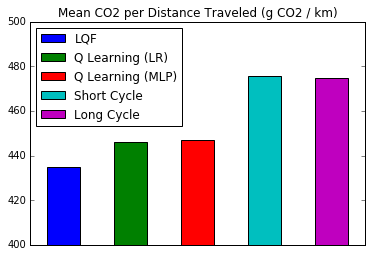

In [7]:
getStats()
def getData(values):
    co2 = movingAverage(values['co2'][:], 1) # per second
    distanceTraveled = movingAverage(values['distanceTraveled'][:], 1) # per second
    return movingAverage(co2 / (distanceTraveled + 1), 300)

from scipy.stats import ttest_ind



scenario = 'two_by_two_3lane'
plotMultiple(
    ['LQF', 'Q Learning (LR)', 'Q Learning (MLP)', 'Short Cycle', 'Long Cycle'],
    *[getData(stats[scenario][agent]) for agent in ['lqf', 'q', 'mlp', 'dumbCycle', 'cycle']]
)
# plt.legend(['Q Learning (LR)', 'Q Learning (MLP)', 'LQF', 'Long Cycle', 'Short Cycle'], loc='best')
plt.title('Mean CO2 per Distance Traveled (g CO2 / km)')
plt.ylim(400, 500)
plt.xticks([])
plt.show()

In [129]:
# getStats()
# args = []
# keys = ['lqf', 'dumbLqf', 'dumbCycle', 'cycle', 'q']
# for key in keys:
#     s = stats[key]
#     args.append(movingAverage(s['numWaiting'][-500:], 100)[::10])
#     args.append(movingAverage(s['co2'][-500:], 100)[::10])
#     args.append('o')
# plt.plot(*args)
# plt.legend(keys, loc='best')

two_by_two_3lane/cycle: 1000 observation
two_by_two_3lane/dumbCycle: 1000 observation
two_by_two_3lane/lqf: 1000 observation
two_by_two_3lane/q: 1000 observation
two_by_two_3lane/mlp: 1000 observation


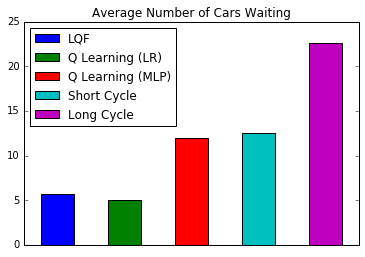

5.6573


In [10]:
getStats()
def getData(values):
    numWaiting = movingAverage(values['numWaiting'][:], 1) # per second
    return numWaiting

scenario = 'two_by_two_3lane'
plotMultiple(
    ['LQF', 'Q Learning (LR)', 'Q Learning (MLP)', 'Short Cycle', 'Long Cycle'],
    *[getData(stats[scenario][agent]) for agent in ['lqf', 'q', 'mlp', 'dumbCycle', 'cycle']]
)
# plt.legend(['Q Learning (LR)', 'Q Learning (MLP)', 'LQF', 'Long Cycle', 'Short Cycle'], loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.title('Average Number of Cars Waiting')
plt.xticks([])
plt.show()
print(np.mean(getData(stats[scenario]['lqf'])))

In [26]:
waitData = np.array([
    movingAverage(stats['q']['numWaiting'][-500:], 150),
    movingAverage(stats['lqf']['numWaiting'][-500:], 150),
    movingAverage(stats['dumbLqf']['numWaiting'][-500:], 150),
    movingAverage(stats['cycle']['numWaiting'][-500:], 150),
    movingAverage(stats['dumbCycle']['numWaiting'][-500:], 150),
]).T
with open('waitData.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Q Learning', 'LQF', 'Stopped LQF', 'Long Cycle', 'Short Cycle'])
    for row in waitData:
        writer.writerow(row)

KeyError: 'numWaiting'

In [343]:
co2Data = np.array([
    movingAverage(stats['q']['co2'][-500:], 150),
    movingAverage(stats['lqf']['co2'][-500:], 150),
    movingAverage(stats['dumbLqf']['co2'][-500:], 150),
    movingAverage(stats['cycle']['co2'][-500:], 150),
    movingAverage(stats['dumbCycle']['co2'][-500:], 150),
]).T
with open('co2Data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Q Learning', 'LQF', 'Stopped LQF', 'Long Cycle', 'Short Cycle'])
    for row in co2Data:
        writer.writerow(row)

dumbLqf: 475 observation
dumbCycle: 563 observation
lqf: 282 observation
default: 69 observation
q: 140 observation
cycle: 167 observation


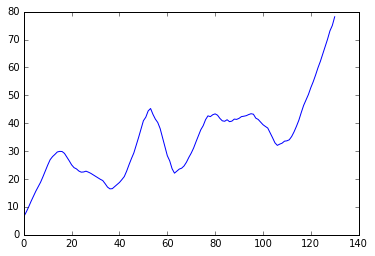

In [347]:
getStats()
plotMultiple(
    movingAverage(stats['q']['numWaiting'][-500:], 10)
)
plt.show()

In [2]:
import matplotlib.axis

In [6]:
matplotlib.axis.Axis()

AttributeError: 'list' object has no attribute 'figure'

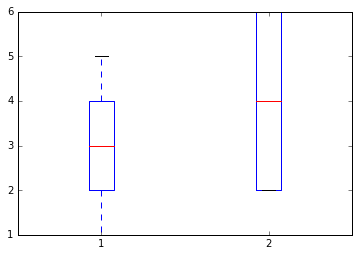

In [44]:
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

# N = 5
# menMeans = (20, 35, 30, 35, 27)
# menStd = (2, 3, 4, 1, 2)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(ind, menMeans, color=['b', 'g', 'r', 'c', 'm'], yerr=menStd)

# womenMeans = (25, 32, 34, 20, 25)
# womenStd = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width)
# ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

plt.boxplot([[1,2,3,4,5], [6,4,2,6,2]])
# plt.bar([1,2,3,4])
plt.show()